In [23]:
from statsmodels.iolib.summary2 import summary_col
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
url = 'https://github.com/SofiyaLyn/Thesis/raw/main/almostcleaned_data.csv'
cleaned_data = pd.read_csv(url)
cleaned_data.head()

,Year,Country,"Proceeds_Amount_+_Over_Sold_This_Market_(USD,_mln)",IPO_market_share,New_Business,IPOs_Number_of_Issues,P/E_Ratio,E/P_ratio,Stock_Market_Index,Interest_rate_up_to_1_mln,...,Aver_interest_rate_to_nonfinance,Real_GDP_Growth_(%),Nominal_GDP_($B),Population_(M),Population_Growth_(%),GDP_Per_Capita_($),Real_Private_Consumption_Growth_(%),Real_Government_Consumption_Growth_(%),Real_Gross_Fixed_Investment_Growth_(%),Industrial_Production_Growth_(%)
0,2009,Hungary,0.00,0.00,42046,1,15.2913,0.07,"21,227.01",NaN,...,#DIV/0!,-3.49,52.02,7.47,(0.67),"6,961.09",-4.69,0.00,-15.95,-20.18
1,2010,Hungary,179.37,64.03,"44,269.00",4,12.1724,0.08,"21,327.07",9.40,...,8.61,1.39,50.68,7.43,(0.65),"6,825.90",1.54,6.13,-19.09,14.13
2,2011,Hungary,0.00,0.00,"52,217.00",1,10.8504,0.09,"16,974.24",9.30,...,8.495,2.36,57.68,7.38,(0.62),"7,817.14",2.14,0.66,-3.66,17.22
3,2012,Hungary,2.93,1.05,"32,311.00",1,12.6385,0.08,"18,173.20",10.46,...,9.65,0.49,54.30,7.33,(0.61),"7,403.74",2.92,-0.27,2.00,2.32
4,2013,Hungary,1.97,0.70,"28,207.00",1,10.6615,0.09,"18,564.08",8.79,...,8.09,-0.59,55.81,7.29,(0.60),"7,655.79",-3.24,2.76,-0.42,-0.98


In [25]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 21 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Year                                                238 non-null    int64  
 1   Country                                             238 non-null    object 
 2   Proceeds_Amount_+_Over_Sold_This_Market_(USD,_mln)  238 non-null    object 
 3   IPO_market_share                                    238 non-null    float64
 4   New_Business                                        238 non-null    object 
 5   IPOs_Number_of_Issues                               238 non-null    int64  
 6   P/E_Ratio                                           198 non-null    float64
 7   E/P_ratio                                           238 non-null    object 
 8   Stock_Market_Index                                  148 non-null    object 
 9  

In [26]:
cleaned_data.columns = cleaned_data.columns.str.replace('(', '_').str.replace(')', '').str.replace('%', 'Percent').str.replace('$', 'Dollar')

In [27]:
cleaned_data['treated'] = cleaned_data['Country'].isin(["Hungary", "Poland", "Slovakia", "Czech Republic", "Slovenia", "Bulgaria", "Romania", "Estonia", "Latvia", "Lithuania"])
cleaned_data['treated'] = cleaned_data['treated'].astype(int)

cleaned_data['post_intervention'] = (cleaned_data['Year'] >= 2015).astype(int)
cleaned_data['treated_intervention'] = cleaned_data['treated'] * cleaned_data['post_intervention']

cleaned_data = cleaned_data.rename(columns={'E/P_ratio': 'Earnings_Price'})
print(cleaned_data.columns)

Index(['Year', 'Country', 'Proceeds_Amount_+_Over_Sold_This_Market__USD,_mln',
       'IPO_market_share', 'New_Business', 'IPOs_Number_of_Issues',
       'P/E_Ratio', 'Earnings_Price', 'Stock_Market_Index',
       'Interest_rate_up_to_1_mln', 'Interest_rate_over_€1M',
       'Aver_interest_rate_to_nonfinance', 'Real_GDP_Growth__Percent',
       'Nominal_GDP__DollarB', 'Population__M', 'Population_Growth__Percent',
       'GDP_Per_Capita__Dollar', 'Real_Private_Consumption_Growth__Percent',
       'Real_Government_Consumption_Growth__Percent',
       'Real_Gross_Fixed_Investment_Growth__Percent',
       'Industrial_Production_Growth__Percent', 'treated', 'post_intervention',
       'treated_intervention'],
      dtype='object')


## Dependent variable should be a numeric one, E/P ratio

In [28]:
cleaned_data['Earnings_Price'] = pd.to_numeric(cleaned_data['Earnings_Price'], errors='coerce')
cleaned_data['Earnings_Price'] = cleaned_data['Earnings_Price'] * 100

In [29]:
formula = 'Earnings_Price ~ treated + post_intervention + treated_intervention'
model = smf.ols(formula, data=cleaned_data).fit()
summary_table = summary_col([model], stars=True)
print(summary_table)


with open('/Users/sonetalyn/Desktop/Thesis/Earnings Price Ratio.html', 'w') as f:
    f.write(summary_table.as_html())



                     Earnings_Price
-----------------------------------
Intercept            7.9655***     
                     (3.0417)      
treated              5.1129        
                     (3.8096)      
post_intervention    1.9693        
                     (3.8840)      
treated_intervention -6.0336       
                     (4.9117)      
R-squared            0.0128        
R-squared Adj.       -0.0026       
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


# Ploting Graph

In [30]:
grouped_data = cleaned_data.groupby(['Year', 'treated']).agg({'Earnings_Price': 'mean'}).reset_index()
sns.set(style="whitegrid")


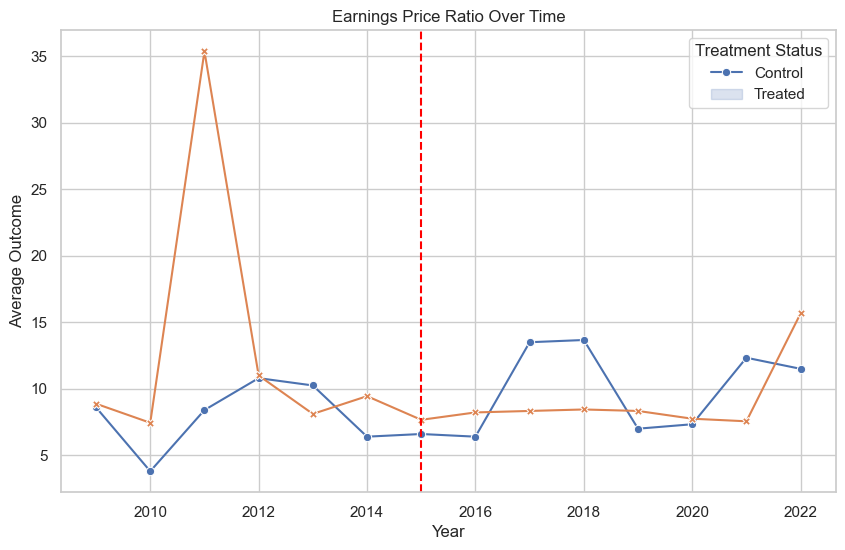

In [31]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_data, x='Year', y='Earnings_Price', hue='treated', style='treated', markers=True, dashes=False)

# Adding labels and title
plt.title('Earnings Price Ratio Over Time')
plt.xlabel('Year')
plt.ylabel('Average Outcome')
plt.axvline(x=2015, color='red', linestyle='--')
plt.legend(title='Treatment Status', labels=['Control', 'Treated'])
plt.savefig('/Users/sonetalyn/Desktop/Thesis/Earnings Price Ratio plot.png')
# Show the plot
plt.show()


## Just with controlled variables

In [33]:
cleaned_data['intercept'] = 1
cleaned_data['Population_Growth__Percent'] = pd.to_numeric(cleaned_data['Population_Growth__Percent'], errors='coerce')
cleaned_data['GDP_Per_Capita__Dollar'] = cleaned_data['GDP_Per_Capita__Dollar'].astype(str).str.replace(',', '').astype(float)
formula = """Earnings_Price ~ treated + post_intervention + treated_intervention + Population_Growth__Percent + GDP_Per_Capita__Dollar + Real_Private_Consumption_Growth__Percent + Real_Government_Consumption_Growth__Percent + Real_Gross_Fixed_Investment_Growth__Percent + Industrial_Production_Growth__Percent + intercept"""
model = smf.ols(formula, data=cleaned_data).fit()
summary_table = summary_col([model], stars=True)
print(summary_table)
with open('/Users/sonetalyn/Desktop/Thesis/Controlled Earnings Price Ratio.html', 'w') as f:
    f.write(summary_table.as_html())


                                            Earnings_Price
----------------------------------------------------------
Intercept                                   7.7375***     
                                            (1.8951)      
treated                                     0.2424        
                                            (2.8112)      
post_intervention                           3.1664        
                                            (2.3131)      
treated_intervention                        -1.6740       
                                            (3.3392)      
Population_Growth__Percent                  -1.3619       
                                            (2.1301)      
GDP_Per_Capita__Dollar                      -0.0004**     
                                            (0.0002)      
Real_Private_Consumption_Growth__Percent    0.1314        
                                            (0.2387)      
Real_Government_Consumption_Growth__Percent -0.2099    

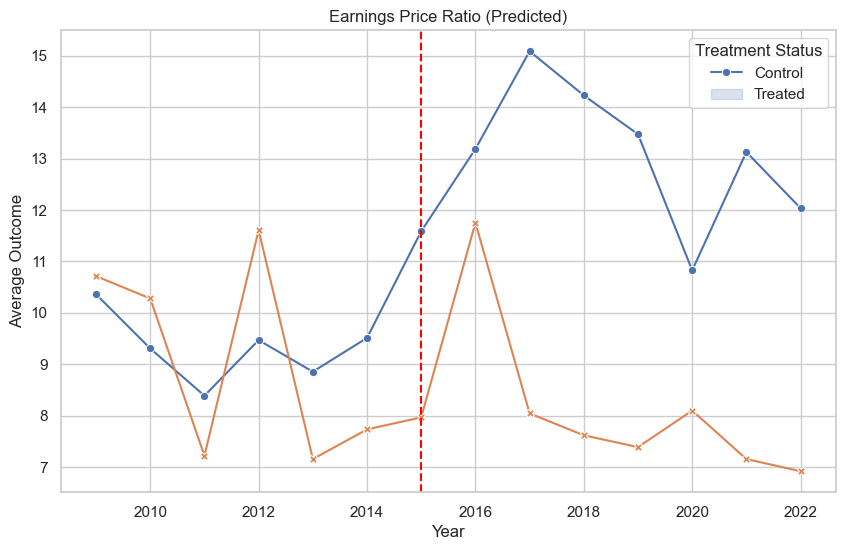

In [35]:
# Fit the model
model = smf.ols(formula, data=cleaned_data).fit()

# Generate predicted values
cleaned_data['predicted'] = model.predict(cleaned_data)

# Group the data by 'Year' and 'treated', and calculate the mean of 'predicted'
grouped_data = cleaned_data.groupby(['Year', 'treated'])['predicted'].mean().reset_index()

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_data, x='Year', y='predicted', hue='treated', style='treated', markers=True, dashes=False)

# Adding labels and title
plt.title('Earnings Price Ratio (Predicted)')
plt.xlabel('Year')
plt.ylabel('Average Outcome')
plt.legend(title='Treatment Status', labels=['Control', 'Treated'])
plt.axvline(x=2015, color='red', linestyle='--')

# Save the plot
plt.savefig('/Users/sonetalyn/Desktop/Thesis/Controlled Earnings Price Ratio.png')

# Show the plot
plt.show()

## With Fixed Effects

In [10]:
formula = 'Earnings_Price ~ treated + post_intervention + treated_intervention + C(Year) + C(Country)'
model = smf.ols(formula, data=cleaned_data).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         Earnings_Price   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     1.254
Date:                Mon, 20 May 2024   Prob (F-statistic):              0.192
Time:                        13:49:25   Log-Likelihood:                -810.91
No. Observations:                 197   AIC:                             1680.
Df Residuals:                     168   BIC:                             1775.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

# FE With Controlled Variables

In [11]:
formula = 'Earnings_Price ~ treated + post_intervention + treated_intervention + C(Year) + C(Country) + Population_Growth__Percent + GDP_Per_Capita__Dollar + Real_Private_Consumption_Growth__Percent + Real_Government_Consumption_Growth__Percent + Real_Gross_Fixed_Investment_Growth__Percent + Industrial_Production_Growth__Percent'
model = smf.ols(formula, data=cleaned_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Earnings_Price   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                 -5.098
Method:                 Least Squares   F-statistic:                    0.1046
Date:                Mon, 20 May 2024   Prob (F-statistic):               1.00
Time:                        13:49:29   Log-Likelihood:                -740.44
No. Observations:                 197   AIC:                             1849.
Df Residuals:                      13   BIC:                             2453.
Df Model:                         183                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [10]:
print("Variables used in the model:", results_controlled.model.exog_names)

Variables used in the model: ['Intercept', 'treated', 'post_intervention', 'treated_intervention', 'Population_Growth__Percent', 'GDP_Per_Capita__Dollar', 'Real_Private_Consumption_Growth__Percent', 'Real_Government_Consumption_Growth__Percent', 'Real_Gross_Fixed_Investment_Growth__Percent', 'Industrial_Production_Growth__Percent', 'intercept']


In [11]:
predict_data = cleaned_data[['Year', 'treated', 'post_intervention', 'treated_intervention',
                             'Population_Growth__Percent', 'GDP_Per_Capita__Dollar',
                             'Real_Private_Consumption_Growth__Percent',
                             'Real_Government_Consumption_Growth__Percent',
                             'Real_Gross_Fixed_Investment_Growth__Percent',
                             'Industrial_Production_Growth__Percent', 'intercept']]

predict_data['pred'] = results_controlled.predict(sm.add_constant(predict_data, has_constant='add'))

/var/folders/h1/_vx7lz596z5c_kynzkqz8l180000gn/T/ipykernel_32112/274464755.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_data['pred'] = results_controlled.predict(sm.add_constant(predict_data, has_constant='add'))


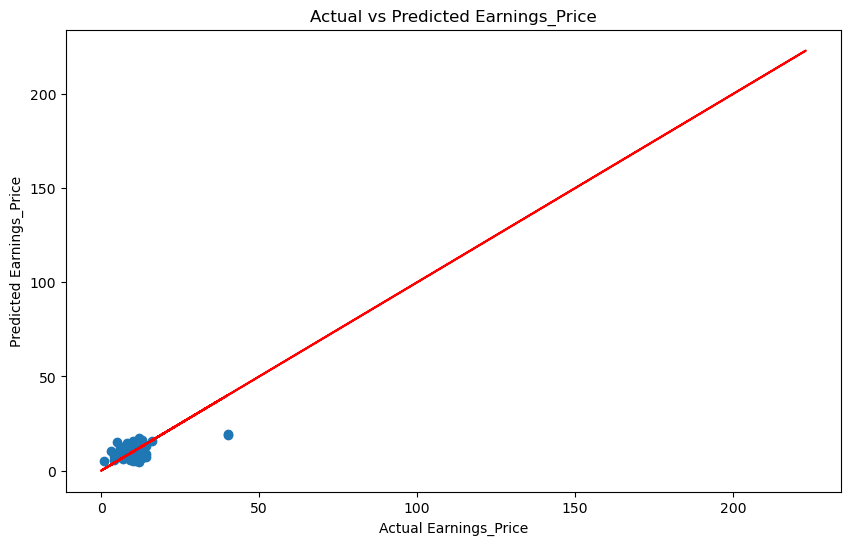

In [21]:
# Generate predictions
predictors = cleaned_data[['treated', 'post_intervention', 'treated_intervention', 'Population_Growth__Percent', 'GDP_Per_Capita__Dollar', 'Real_Private_Consumption_Growth__Percent', 'Real_Government_Consumption_Growth__Percent', 'Real_Gross_Fixed_Investment_Growth__Percent', 'Industrial_Production_Growth__Percent', 'intercept']]
cleaned_data['predictions'] = model.predict(predictors)

# Create scatter plot
plt.figure(figsize=(10,6))
plt.scatter(cleaned_data['Earnings_Price'], cleaned_data['predictions'])
plt.plot(cleaned_data['Earnings_Price'], cleaned_data['Earnings_Price'], color='red') # line of perfect prediction
plt.xlabel('Actual Earnings_Price')
plt.ylabel('Predicted Earnings_Price')
plt.title('Actual vs Predicted Earnings_Price')
plt.show()

In [24]:
grouped_predict = cleaned_data.groupby(['Year', 'treated', 'post_intervention'])['Earnings_Price'].mean().reset_index()

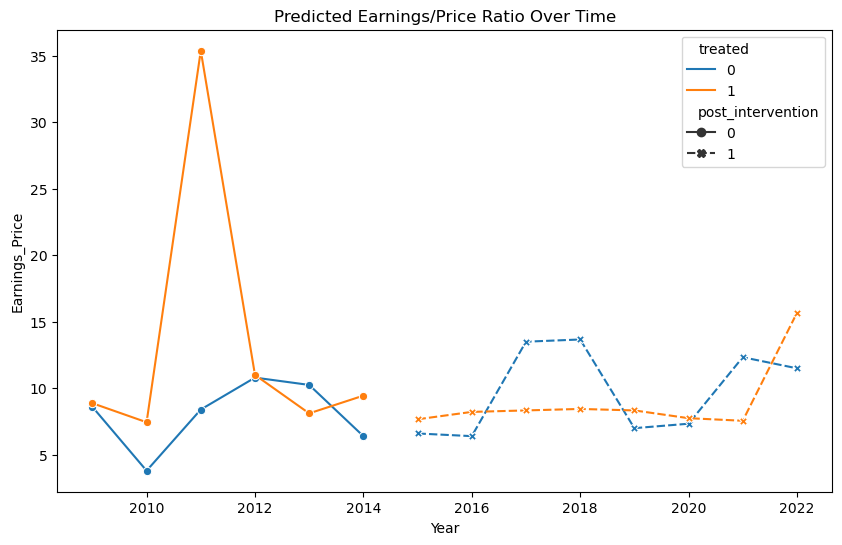

In [26]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_predict, x='Year', y='Earnings_Price', hue='treated', style='post_intervention', markers=True)
plt.title('Predicted Earnings/Price Ratio Over Time')
plt.xlabel('Year')
plt.show()

In [37]:
predict_data = cleaned_data[['Year', 'treated', 'post_intervention', 'treated_intervention',
                             'Population_Growth__Percent', 'GDP_Per_Capita__Dollar',
                             'Real_Private_Consumption_Growth__Percent',
                             'Real_Government_Consumption_Growth__Percent',
                             'Real_Gross_Fixed_Investment_Growth__Percent',
                             'Industrial_Production_Growth__Percent', 'intercept']]

predict_data['pred'] = results_controlled.predict(sm.add_constant(predict_data, has_constant='add'))

/var/folders/h1/_vx7lz596z5c_kynzkqz8l180000gn/T/ipykernel_31960/274464755.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_data['pred'] = results_controlled.predict(sm.add_constant(predict_data, has_constant='add'))


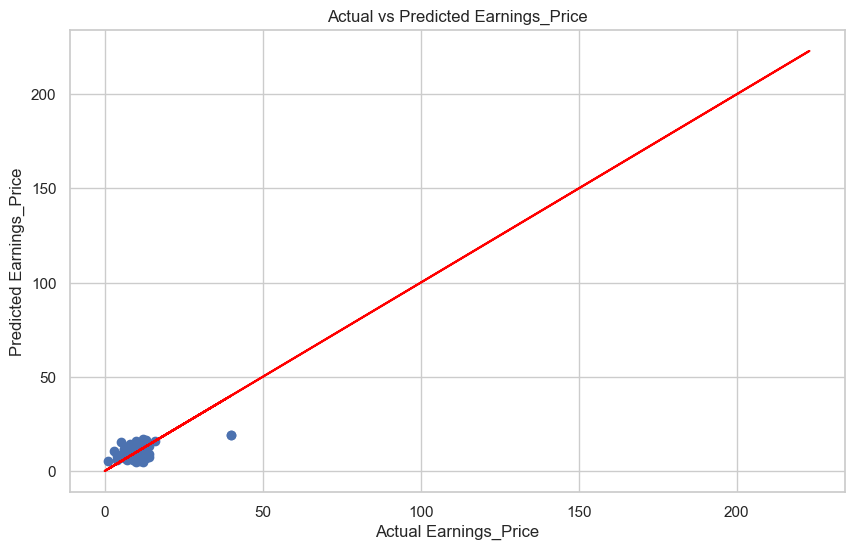

In [38]:
# Generate predictions
predictors = cleaned_data[['treated', 'post_intervention', 'treated_intervention', 'Population_Growth__Percent', 'GDP_Per_Capita__Dollar', 'Real_Private_Consumption_Growth__Percent', 'Real_Government_Consumption_Growth__Percent', 'Real_Gross_Fixed_Investment_Growth__Percent', 'Industrial_Production_Growth__Percent', 'intercept']]
cleaned_data['predictions'] = model.predict(predictors)

# Create scatter plot
plt.figure(figsize=(10,6))
plt.scatter(cleaned_data['Earnings_Price'], cleaned_data['predictions'])
plt.plot(cleaned_data['Earnings_Price'], cleaned_data['Earnings_Price'], color='red') # line of perfect prediction
plt.xlabel('Actual Earnings_Price')
plt.ylabel('Predicted Earnings_Price')
plt.title('Actual vs Predicted Earnings_Price')
plt.show()

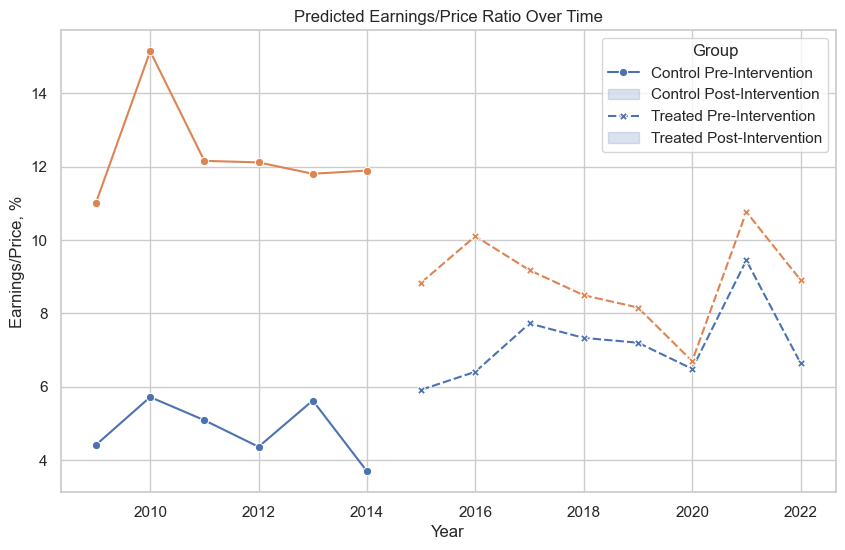

In [14]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_predict, x='Year', y='pred', hue='treated', style='post_intervention', markers=True)
plt.title('Predicted Earnings/Price Ratio Over Time')
plt.xlabel('Year')
plt.ylabel('Earnings/Price, %')
plt.legend(title='Group', labels=['Control Pre-Intervention', 'Control Post-Intervention', 'Treated Pre-Intervention', 'Treated Post-Intervention'])
plt.savefig('/Users/sonetalyn/Desktop/Thesis/predicted_ep_ratio.png')

plt.show()